# Classification Using Decision Tree

**Objective:**  
To implement a Decision Tree classifier using Entropy and Information Gain and identify the root node using a given dataset.


In [34]:
import pandas as pd
import numpy as np
import math

In [35]:
df = pd.read_csv("../data/raw/student_performance_dataset.csv")

In [36]:
df = df.drop(columns=["StudentID"])
df

,StudyHours,Attendance,PreviousScore,FinalResult
0,2,65,45,Fail
1,4,70,55,Fail
2,6,75,60,Pass
3,8,85,72,Pass
4,10,90,80,Pass
5,1,50,40,Fail
6,3,60,48,Fail
7,7,82,70,Pass
8,9,88,78,Pass
9,5,72,65,Pass


In [37]:
target = "FinalResult"
df[target].value_counts()


FinalResult
Pass    6
Fail    4
Name: count, dtype: int64

In [38]:
def entropy(column):
    values, counts = np.unique(column, return_counts=True)

    if len(values) == 1:
        return 0.0

    total = counts.sum()
    ent = 0
    for count in counts:
        p = count / total
        ent -= p * math.log2(p)
    return ent


In [39]:
entropy_target = entropy(df[target])
entropy_target

0.9709505944546686

In [40]:
def information_gain(df, feature, target):
    total_entropy = entropy(df[target])
    mean_value = df[feature].mean()

    left = df[df[feature] <= mean_value]
    right = df[df[feature] > mean_value]

    ent_left = entropy(left[target])
    ent_right = entropy(right[target])

    weighted_entropy = (
        (len(left)/len(df)) * ent_left +
        (len(right)/len(df)) * ent_right
    )

    ig = total_entropy - weighted_entropy

    print(f"{feature}")
    print(f" Mean = {mean_value}")
    print(f" Entropy Left = {ent_left}")
    print(f" Entropy Right = {ent_right}")
    print(f" IG = {ig}\n")

    return ig, mean_value

In [41]:
ig_study, mean_study = information_gain(df, "StudyHours", target)
ig_study, mean_study

StudyHours
 Mean = 5.5
 Entropy Left = 0.7219280948873623
 Entropy Right = 0.0
 IG = 0.6099865470109874



(0.6099865470109874, 5.5)

In [42]:
ig_attendance, mean_attendance = information_gain(df, "Attendance", target)
ig_attendance, mean_attendance

Attendance
 Mean = 73.7
 Entropy Left = 0.7219280948873623
 Entropy Right = 0.0
 IG = 0.6099865470109874



(0.6099865470109874, 73.7)

In [43]:
ig_previous, mean_previous = information_gain(df, "PreviousScore", target)
ig_previous, mean_previous

PreviousScore
 Mean = 61.3
 Entropy Left = 0.7219280948873623
 Entropy Right = 0.0
 IG = 0.6099865470109874



(0.6099865470109874, 61.3)

## Root Node Selection

The attribute **PreviousScore** has the highest Information Gain.
Therefore, it is selected as the root node of the Decision Tree.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
df["FinalResult"] = le.fit_transform(df["FinalResult"])


In [46]:
X = df.drop(columns=["FinalResult"])
y = df["FinalResult"]

model = DecisionTreeClassifier(criterion="entropy", max_depth=2)
model.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


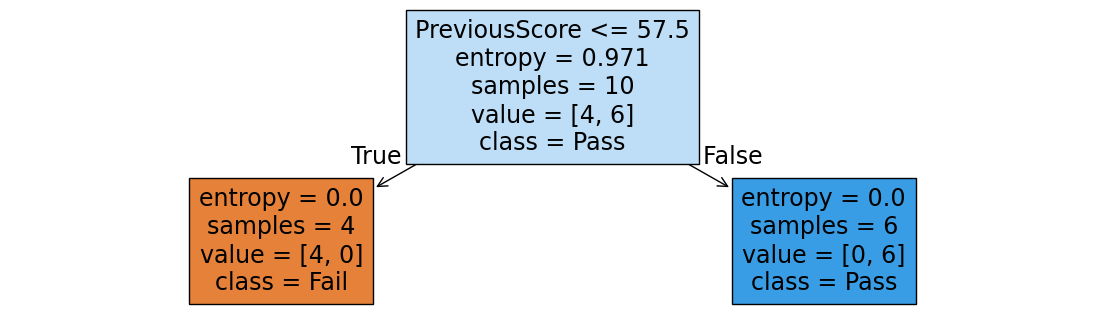

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plot_tree(model, feature_names=X.columns, class_names=["Fail", "Pass"], filled=True)
plt.show()